# Machine Learning Extension from Netherlands_SpotifyChart_EDA

__Summary of Dataset__
1. Spotify dataset from bootcamp including the following:
  - name (i.e. Title of song)
  - artists
  - popularity
  - danceability
  - valence
  - energy
  - explicit
  - key
  - liveness
  - loudness
  - speachiness
  - tempo

__Summary of Kaggle Spotify Chart Dataset__
1. Data taken from Kaggle: https://www.kaggle.com/datasets/dhruvildave/spotify-charts
2. CSV file includes Top 200 and Viral 50 data from 1 January 2017 till 31 July 2021
3. Data organised into following columns:
  - Title of song
  - Rank of song in Top 200 or Viral 50
  - Date
  - Artist name
  - URL of song
  - Region (Country)
  - Chart
  - Whether the song has moved up, down etc. in chart
  - Number of streams


# 1. Load libraries and data

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from PIL import Image
import cufflinks as cf
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

import matplotlib.dates as mdates

# Text Decoding
from unidecode import unidecode

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots sample against a Normal distribution, 
# to see whether sample is normally distributed or not

In [2]:
# Loading of 10,000 songs and their characteristics
spotify = pd.read_csv('data/ML_spotify_data.csv')
spotify.sample(10)

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
8038,We Move Lightly,"[""Dustin O'Halloran""]",49,0.179,0.0575,0.133,0,5,0.0712,-17.889,0.0419,150.286
3057,Tearing Us Apart,['Eric Clapton'],29,0.758,0.9670,0.939,0,7,0.3000,-4.485,0.0323,121.652
4129,Y Si Lloro Que,['Viento Y Sol'],31,0.458,0.6590,0.613,0,2,0.3150,-8.053,0.0376,79.216
3053,Fire in the Rain,['Agent Orange'],24,0.324,0.4570,0.735,0,9,0.1090,-12.657,0.0566,83.311
2611,Dance All Over Your Face,['KISS'],26,0.580,0.7250,0.863,0,2,0.4490,-7.306,0.0300,90.152
1093,ブルー・スター,['セキトオ・シゲオ'],24,0.205,0.0389,0.224,0,3,0.1150,-10.754,0.0333,101.536
5378,A Esa Gran Velocidad,['El Haragán y Compañía'],44,0.465,0.4180,0.378,0,9,0.0650,-6.923,0.0274,80.555
7649,你瞞我瞞,['Jason Chan'],56,0.650,0.4030,0.425,0,9,0.1200,-7.816,0.0266,75.988
6440,"They Perched On Their Stilts, Pointing And Dar...",['Saosin'],38,0.441,0.3880,0.949,0,4,0.2710,-4.408,0.0568,145.058
6817,Searchin',['The Coasters'],41,0.776,0.9240,0.495,0,8,0.1960,-13.861,0.0503,73.282


In [3]:
# Loading the Top 200 and Viral 50 Spotify Charts across the role from 2017 to 2021
cols_int = ['title','rank','date','artist','region','chart','streams']

chart = pd.read_csv('data/charts.csv',usecols=cols_int)
chart.head()

,title,rank,date,artist,region,chart,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,top200,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,top200,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,top200,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,top200,153956.0


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10000 non-null  object 
 1   artist        10000 non-null  object 
 2   popularity    10000 non-null  int64  
 3   danceability  10000 non-null  float64
 4   valence       10000 non-null  float64
 5   energy        10000 non-null  float64
 6   explicit      10000 non-null  int64  
 7   key           10000 non-null  int64  
 8   liveness      10000 non-null  float64
 9   loudness      10000 non-null  float64
 10  speechiness   10000 non-null  float64
 11  tempo         10000 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 937.6+ KB


In [7]:
chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   region   object 
 5   chart    object 
 6   streams  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ GB


# 2. Clean data

In [4]:
# Making the spotify df more compatible with the chart df by changing column names for artist and title of song
spotify = spotify.rename(columns={'name': 'title', 'artists': 'artist'})
spotify.head(2)

,title,artist,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783


In [8]:
print(type(spotify.loc[1,'artist']))

<class 'str'>


In [10]:
# Getting rid of brackets and single quotes so that they are the same in both dfs
songs = spotify.copy()

songs['artist'] = songs['artist'].str.strip("[]").str.replace("'", "")

songs.sample(5)

,title,artist,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
8893,Battle Against A True Hero,Toby Fox,55,0.456,0.734,0.955,0,5,0.1490,-10.112,0.0394,150.114
6488,Heart Of A Woman,R. Kelly,37,0.613,0.623,0.466,0,7,0.1600,-6.146,0.0372,122.043
4506,Leave That Thing Alone - 2004 Remaster,Rush,34,0.489,0.674,0.954,0,9,0.3320,-7.025,0.0525,119.976
9691,Shiesty Summer,Pooh Shiesty,57,0.827,0.651,0.582,1,1,0.0906,-6.896,0.2290,140.000
7041,The Total Experience,"Boney James, George Duke",41,0.562,0.518,0.765,0,0,0.1080,-6.031,0.0372,99.987


In [18]:
# Creating a function where you decode if the instance is a string

def unidecode_str(words):

    if isinstance(words, str):
        return unidecode(words)
    
    return words

In [19]:
# Decoding the title and artist columns 
songs[['title','artist']] = songs[['title','artist']].applymap(unidecode_str)
chart[['title','artist']] = chart[['title','artist']].applymap(unidecode_str)

In [20]:
# Merging the 2 dfs based on title and artist
merged = pd.merge(chart, songs, on=['title', 'artist'])

In [21]:
merged.sample(5)

,title,rank,date,artist,region,chart,streams,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
367501,On A Roll,15,2019-07-22,Ashley O,El Salvador,viral50,NaN,64,0.737,0.387,0.810,0,5,0.0523,-6.354,0.0896,125.005
202682,Se Me Olvido,20,2020-03-17,Christian Nodal,Bolivia,top200,8462.0,77,0.650,0.725,0.558,0,0,0.3030,-3.082,0.0309,141.820
242699,No Es Justo,4,2018-05-20,"J Balvin, Zion & Lennox",Honduras,viral50,NaN,69,0.684,0.721,0.811,0,7,0.0871,-4.494,0.0714,87.866
80877,New Rules,191,2019-12-19,Dua Lipa,Costa Rica,top200,3264.0,53,0.762,0.608,0.700,0,9,0.1530,-6.021,0.0694,116.073
303822,Mad Love,8,2019-08-02,Mabel,Ireland,top200,37492.0,73,0.623,0.607,0.796,0,0,0.1150,-2.981,0.1990,197.524


In [22]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406728 entries, 0 to 406727
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         406728 non-null  object 
 1   rank          406728 non-null  int64  
 2   date          406728 non-null  object 
 3   artist        406728 non-null  object 
 4   region        406728 non-null  object 
 5   chart         406728 non-null  object 
 6   streams       326803 non-null  float64
 7   popularity    406728 non-null  int64  
 8   danceability  406728 non-null  float64
 9   valence       406728 non-null  float64
 10  energy        406728 non-null  float64
 11  explicit      406728 non-null  int64  
 12  key           406728 non-null  int64  
 13  liveness      406728 non-null  float64
 14  loudness      406728 non-null  float64
 15  speechiness   406728 non-null  float64
 16  tempo         406728 non-null  float64
dtypes: float64(8), int64(4), object(5)
memory usage:

In [24]:
# Checking between songs, chart, and merged dfs
songs[(songs == 'Dua Lipa').any(axis=1)]

,title,artist,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
9273,Blow Your Mind (Mwah),Dua Lipa,65,0.654,0.491,0.796,1,2,0.0948,-4.761,0.1220,108.854
9277,New Rules,Dua Lipa,53,0.762,0.608,0.700,0,9,0.1530,-6.021,0.0694,116.073
9963,Cool,Dua Lipa,72,0.470,0.790,0.785,0,5,0.0931,-4.015,0.0664,89.717


In [25]:
merged[(merged == 'Dua Lipa').any(axis=1)]

,title,rank,date,artist,region,chart,streams,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
17710,Blow Your Mind (Mwah),165,2017-01-01,Dua Lipa,Australia,top200,11405.0,65,0.654,0.491,0.796,1,2,0.0948,-4.761,0.1220,108.854
17711,Blow Your Mind (Mwah),177,2017-01-01,Dua Lipa,Brazil,top200,30136.0,65,0.654,0.491,0.796,1,2,0.0948,-4.761,0.1220,108.854
17712,Blow Your Mind (Mwah),190,2017-01-01,Dua Lipa,France,top200,14886.0,65,0.654,0.491,0.796,1,2,0.0948,-4.761,0.1220,108.854
17713,Blow Your Mind (Mwah),94,2017-01-01,Dua Lipa,Ireland,top200,3394.0,65,0.654,0.491,0.796,1,2,0.0948,-4.761,0.1220,108.854
17714,Blow Your Mind (Mwah),183,2017-01-01,Dua Lipa,New Zealand,top200,3396.0,65,0.654,0.491,0.796,1,2,0.0948,-4.761,0.1220,108.854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376675,Cool,116,2020-03-31,Dua Lipa,Poland,top200,21525.0,72,0.470,0.790,0.785,0,5,0.0931,-4.015,0.0664,89.717
376676,Cool,102,2020-03-31,Dua Lipa,Slovakia,top200,1824.0,72,0.470,0.790,0.785,0,5,0.0931,-4.015,0.0664,89.717
376677,Cool,59,2020-03-31,Dua Lipa,United Kingdom,top200,93324.0,72,0.470,0.790,0.785,0,5,0.0931,-4.015,0.0664,89.717
376678,Cool,161,2020-03-31,Dua Lipa,United States,top200,227899.0,72,0.470,0.790,0.785,0,5,0.0931,-4.015,0.0664,89.717


In [28]:
# If the Song details are not in the spotify df, they will not exist in the merged version
merged[(merged == 'Billie Eilish').any(axis=1)]

,title,rank,date,artist,region,chart,streams,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo


In [26]:
songs[(songs == 'Billie Eilish').any(axis=1)]

,title,artist,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo


In [27]:
chart[(chart == 'Billie Eilish').any(axis=1)]

,title,rank,date,artist,region,chart,streams
57181,COPYCAT,50,2017-08-01,Billie Eilish,Taiwan,viral50,NaN
66054,bad guy,136,2020-05-01,Billie Eilish,Argentina,top200,29007.0
66184,bad guy,65,2020-05-01,Billie Eilish,Australia,top200,64572.0
66186,everything i wanted,67,2020-05-01,Billie Eilish,Australia,top200,62106.0
66218,lovely (with Khalid),99,2020-05-01,Billie Eilish,Australia,top200,46144.0
...,...,...,...,...,...,...,...
26112702,Your Power,50,2021-05-30,Billie Eilish,New Zealand,viral50,NaN
26112741,Your Power,39,2021-05-30,Billie Eilish,Nicaragua,viral50,NaN
26113773,Your Power,36,2021-05-30,Billie Eilish,Saudi Arabia,viral50,NaN
26114913,Your Power,41,2021-05-30,Billie Eilish,United Arab Emirates,viral50,NaN


# 3. Trends in the Top 200 Global songs

In [36]:
# Creating Top 200 songs in Global dataframe: This may not have lots of songs because of the spotify df limitations
top200 = merged[(merged['chart'] == 'top200') & 
              ((merged['region'] == 'Global'))]
top200.sample(5)

,title,rank,date,artist,region,chart,streams,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
250709,Green Light,106,2017-06-24,Lorde,Global,top200,688417.0,59,0.594,0.253,0.721,0,2,0.0879,-7.812,0.0957,128.942
120733,Shooting Stars,141,2017-03-13,Bag Raiders,Global,top200,557363.0,47,0.664,0.555,0.717,0,11,0.1380,-5.699,0.0391,124.989
107096,Be Mine,155,2017-06-27,Ofenbach,Global,top200,520460.0,69,0.779,0.507,0.666,0,5,0.0576,-7.361,0.0482,123.024
169583,Adan y Eva,115,2019-05-20,Paulo Londra,Global,top200,869426.0,73,0.767,0.720,0.709,0,1,0.0676,-4.470,0.3360,171.993
317407,No Me Acuerdo,90,2018-08-12,"Thalia, Natti Natasha",Global,top200,785099.0,71,0.837,0.748,0.784,0,7,0.0897,-4.531,0.1010,94.036


In [37]:
top200.shape

(6595, 17)

In [40]:
top200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6595 entries, 8 to 404240
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         6595 non-null   object        
 1   rank          6595 non-null   int64         
 2   date          6595 non-null   datetime64[ns]
 3   artist        6595 non-null   object        
 4   region        6595 non-null   object        
 5   chart         6595 non-null   object        
 6   streams       6595 non-null   float64       
 7   popularity    6595 non-null   int64         
 8   danceability  6595 non-null   float64       
 9   valence       6595 non-null   float64       
 10  energy        6595 non-null   float64       
 11  explicit      6595 non-null   int64         
 12  key           6595 non-null   int64         
 13  liveness      6595 non-null   float64       
 14  loudness      6595 non-null   float64       
 15  speechiness   6595 non-null   float6

In [39]:
# Convert date into datetime type
top200['date'] = pd.to_datetime(top200['date'])

In [42]:
# Note: Top streamed artists in Top 200 Global for 2017-2021 with songs in the spotify df
top_artists = top200['artist'].value_counts()
top_artists.head()

Dua Lipa        720
Jason Mraz      462
TOTO            459
The Police      369
Paulo Londra    291
Name: artist, dtype: int64

In [45]:
top200['artist'].value_counts().head(25).iplot(kind='bar')

## 3.1 Numerical Features

In [48]:
top200.isna().sum()

title           0
rank            0
date            0
artist          0
region          0
chart           0
streams         0
popularity      0
danceability    0
valence         0
energy          0
explicit        0
key             0
liveness        0
loudness        0
speechiness     0
tempo           0
dtype: int64

In [47]:
spotify_num = top200.select_dtypes(exclude = ['object'])
spotify_num

,rank,date,streams,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
8,116,2017-01-01,487214.0,67,0.777,0.704,0.911,0,6,0.257,-3.223,0.1730,96.017
31,144,2017-01-02,435983.0,67,0.777,0.704,0.911,0,6,0.257,-3.223,0.1730,96.017
63,79,2017-02-01,737527.0,67,0.777,0.704,0.911,0,6,0.257,-3.223,0.1730,96.017
71,145,2017-01-03,463393.0,67,0.777,0.704,0.911,0,6,0.257,-3.223,0.1730,96.017
93,79,2017-02-02,750369.0,67,0.777,0.704,0.911,0,6,0.257,-3.223,0.1730,96.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399103,64,2020-07-24,1531025.0,66,0.794,0.831,0.845,1,1,0.124,-6.118,0.3870,93.939
399115,155,2020-07-25,794634.0,66,0.794,0.831,0.845,1,1,0.124,-6.118,0.3870,93.939
404222,139,2017-11-01,587582.0,58,0.926,0.656,0.544,1,5,0.112,-6.827,0.0727,115.951
404226,189,2017-11-02,496387.0,58,0.926,0.656,0.544,1,5,0.112,-6.827,0.0727,115.951


## 3.2 Correlations

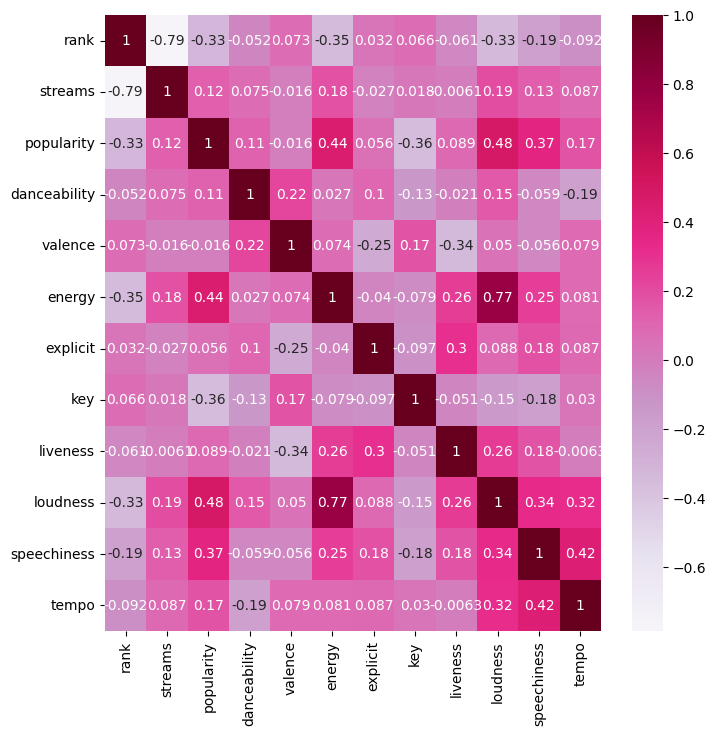

In [49]:
plt.figure(figsize=(8,8))

sns.heatmap(spotify_num.corr(),
            annot = True,
            annot_kws = {"fontsize":10},
            cmap='PuRd');